上⼀章我们介绍了卷积神经⽹络的基本原理，本章我们将带你了解现代的卷积神经⽹络架构，许多现代卷积神经⽹络的研究都是建⽴在这⼀章的基础上的。在本章中的每⼀个模型都曾⼀度占据主导地位，其中许多模型都是ImageNet竞赛的优胜者。ImageNet竞赛⾃2010年以来，⼀直是计算机视觉中监督学习进展的指向标。
1. AlexNet。它是第⼀个在⼤规模视觉竞赛中击败传统计算机视觉模型的⼤型神经⽹络；
2. 使用重复块的⽹络（VGG）。它利⽤许多重复的神经⽹络块；
3. ⽹络中的⽹络（NiN）。它重复使⽤由卷积层和1 × 1卷积层（⽤来代替全连接层）来构建深层⽹络;
4. 含并⾏连结的⽹络（GoogLeNet）。它使⽤并⾏连结的⽹络，通过不同窗⼝⼤⼩的卷积层和最⼤汇聚层来并⾏抽取信息；
5. 残差⽹络（ResNet）。它通过残差块构建跨层的数据通道，是计算机视觉中最流⾏的体系架构；
6. 稠密连接⽹络（DenseNet）。它的计算成本很⾼，但给我们带来了更好的效果。

虽然深度神经⽹络的概念⾮常简单——将神经⽹络堆叠在⼀起。但由于不同的⽹络架构和超参数选择，这些神经⽹络的性能会发⽣很⼤变化。本章介绍的神经⽹络是将⼈类直觉和相关数学⻅解结合后，经过⼤量研究试错后的结晶。我们会按时间顺序介绍这些模型，在追寻历史的脉络的同时，帮助你培养对该领域发展的直觉。这将有助于你研究开发⾃⼰的架构。

例如，本章介绍的批量规范化（batch normalization）和残差⽹络（ResNet）为设计和训练深度神经⽹络提供了重要思想指导。

# 深度卷积神经网络（AlexNet）

在LeNet提出后，卷积神经⽹络在计算机视觉和机器学习领域中很有名⽓。但卷积神经⽹络并没有主导这些领域。这是因为虽然LeNet在⼩数据集上取得了很好的效果，但是在更⼤、更真实的数据集上训练卷积神经⽹络的性能和可⾏性还有待研究。事实上，在上世纪90年代初到2012年之间的⼤部分时间⾥，神经⽹络往往被其他机器学习⽅法超越，如⽀持向量机（support vector machines）。

在计算机视觉中，直接将神经⽹络与其他机器学习⽅法进⾏⽐较也许不公平。这是因为，卷积神经⽹络的输⼊是由原始像素值或是经过简单预处理（例如居中、缩放）的像素值组成的。但在使⽤传统机器学习⽅法时，从业者永远不会将原始像素作为输⼊。在传统机器学习⽅法中，计算机视觉流⽔线是由经过⼈的手工精心设计的特征流⽔线组成的。对于这些传统⽅法，⼤部分的进展都来⾃于对特征有了更聪明的想法，并且学习到的算法往往归于事后的解释。

虽然上世纪90年代就有了⼀些神经⽹络加速卡，但仅靠它们还不⾜以开发出有⼤量参数的深层多通道多层卷积神经⽹络。此外，当时的**数据集仍然相对较⼩**。除了这些障碍，训练神经⽹络的⼀些**关键技巧仍然缺失**，包括**启发式参数初始化**、**随机梯度下降的变体**、**⾮挤压激活函数**和**有效的正则化技术**。

因此，与训练端到端（从像素到分类结果）系统不同，经典机器学习的流⽔线看起来更像下⾯这样：
1. 获取⼀个有趣的数据集。在早期，收集这些数据集需要昂贵的传感器（在当时最先进的图像也就100万像素）。
2. 根据光学、⼏何学、其他知识以及偶然的发现，⼿⼯对特征数据集进⾏预处理。
3. 通过标准的特征提取算法，如SIFT（尺度不变特征变换）[Lowe, 2004]和SURF（加速鲁棒特征）[Bay et al., 2006]或其他⼿动调整的流⽔线来输⼊数据。
4. 将提取的特征送⼊最喜欢的分类器中（例如线性模型或其它核⽅法），以训练分类器。

## 学习表征

另⼀种预测这个领域发展的⽅法————观察图像特征的提取⽅法。在2012年前，图像特征都是机械地计算出来的。事实上，设计⼀套新的特征函数、改进结果，并撰写论⽂是盛极⼀时的潮流。SIFT [Lowe, 2004]、SURF[Bay et al., 2006]、HOG（定向梯度直⽅图）[Dalal & Triggs, 2005]、bags of visual words 89 和类似的特征提取⽅法占据了主导地位。

另⼀组研究⼈员，包括Yann LeCun、Geoff Hinton、Yoshua Bengio、Andrew Ng、Shun ichi Amari和Juergen Schmidhuber，想法则与众不同：他们认为特征本⾝应该被学习。此外，他们还认为，在合理地复杂性前提下，特征应该由多个共同学习的神经⽹络层组成，每个层都有可学习的参数。在机器视觉中，最底层可能检测边缘、颜⾊和纹理。事实上，Alex Krizhevsky、Ilya Sutskever和Geoff Hinton提出了⼀种新的卷积神经⽹络变体AlexNet。在2012年ImageNet挑战赛中取得了轰动⼀时的成绩。AlexNet以Alex Krizhevsky的名字命名，他是论⽂ [Krizhevsky et al., 2012]的第⼀作者。

有趣的是，在⽹络的最底层，模型学习到了⼀些类似于传统滤波器的特征抽取器。下图是从AlexNet论⽂[Krizhevsky et al., 2012]复制的，描述了底层图像特征。

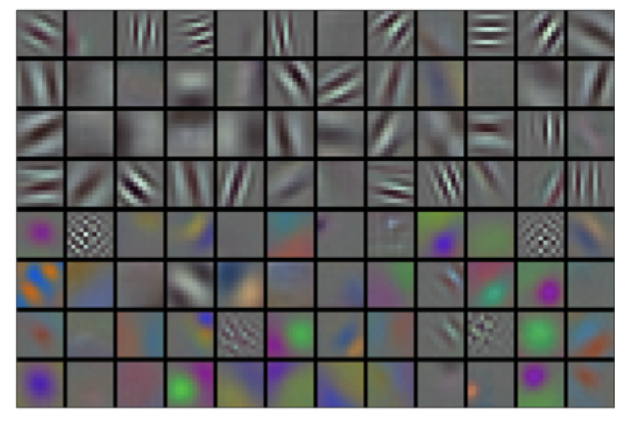

AlexNet的更⾼层建⽴在这些底层表⽰的基础上，以表⽰更⼤的特征，如眼睛、⿐⼦、草叶等等。⽽更⾼的层可以检测整个物体，如⼈、⻜机、狗或⻜盘。最终的隐藏神经元可以学习图像的综合表⽰，从⽽使属于不同类别的数据易于区分。尽管⼀直有⼀群执着的研究者不断钻研，试图学习视觉数据的逐级表征，然⽽很⻓⼀段时间⾥这些尝试都未有突破。深度卷积神经⽹络的突破出现在2012年。突破可归因于两个关键因素。
1. 缺少的成分：数据
2. 缺少的成分：硬件

## AlexNet

AlexNet和LeNet的设计理念非常相似，但也存在显著差异。
1. AlexNet网络更为复杂，由8层组成：5个卷积层、两个全连接隐藏层和一个全连接输出层。
2. AlexNet使用的激活函数为ReLU。⼀⽅⾯，ReLU激活函数的计算更简单，它不需要如sigmoid激活函数那般复杂的求幂运算。另⼀⽅⾯，当使⽤不同的参数初始化⽅法时，ReLU激活函数使训练模型更加容易。
3. AlexNet通过暂退法控制全连接层模型复杂度。
4. 做了图像增强操作，使得模型更健壮，更大的样本量也有效的减少了过拟合。

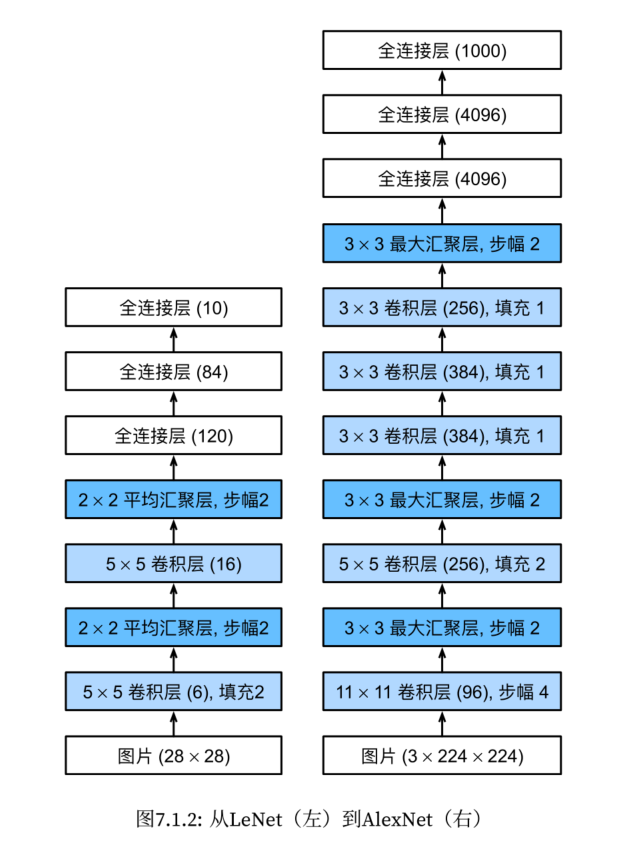

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
net = nn.Sequential(nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2),
                   nn.Conv2d(96, 256, kernel_size=5, padding=2),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2),
                   nn.Conv2d(256, 384, kernel_size=3, padding=1),
                   nn.ReLU(),
                   nn.Conv2d(384, 384, kernel_size=3, padding=1),
                   nn.ReLU(),
                   nn.Conv2d(384, 256, kernel_size=3, padding=1),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2),
                   nn.Flatten(),
                   nn.Linear(6400, 4096),
                   nn.ReLU(),
                   nn.Dropout(p=0.5),
                   nn.Linear(4096, 4096),
                   nn.ReLU(),
                   nn.Dropout(p=0.5),
                   nn.Linear(4096, 10))

In [3]:
# 查看每层的尺寸
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)

Conv2d output shape: 	 torch.Size([1, 96, 54, 54])
ReLU output shape: 	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape: 	 torch.Size([1, 96, 26, 26])
Conv2d output shape: 	 torch.Size([1, 256, 26, 26])
ReLU output shape: 	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape: 	 torch.Size([1, 256, 12, 12])
Conv2d output shape: 	 torch.Size([1, 384, 12, 12])
ReLU output shape: 	 torch.Size([1, 384, 12, 12])
Conv2d output shape: 	 torch.Size([1, 384, 12, 12])
ReLU output shape: 	 torch.Size([1, 384, 12, 12])
Conv2d output shape: 	 torch.Size([1, 256, 12, 12])
ReLU output shape: 	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape: 	 torch.Size([1, 256, 5, 5])
Flatten output shape: 	 torch.Size([1, 6400])
Linear output shape: 	 torch.Size([1, 4096])
ReLU output shape: 	 torch.Size([1, 4096])
Dropout output shape: 	 torch.Size([1, 4096])
Linear output shape: 	 torch.Size([1, 4096])
ReLU output shape: 	 torch.Size([1, 4096])
Dropout output shape: 	 torch.Size([1, 4096])
Linear output sh

## 读取数据集

In [4]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

## 训练AlexNet

training on cuda:0


RuntimeError: DataLoader worker (pid(s) 26116) exited unexpectedly

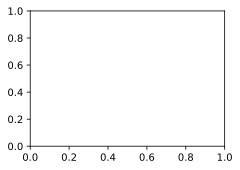

In [7]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())